# Clean the Data Frame

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Bring in the Data

In [2]:
df = pd.read_csv('courses_in_english.csv')

In [3]:
df.head()

,Unnamed: 0,name,instructor,level,category,subcategory,no_of_students,rating,no_of_rating,about,syllabus,language
0,0,Meditation: A way to achieve your goals in you...,Duck-Joo Lee,Beginner Level,Arts and Humanities,Philosophy,"78,489 already enrolled",4.6stars,843 ratings,Do we truly think that we have lived for ourse...,['Self- reflection is the methodology of medit...,English
1,1,Introduction to the Arctic: Climate,"Paul Myers, Ph.D",NaN,Physical Science and Engineering,Environmental Science and Sustainability,"13,439 already enrolled",4.6stars,420 ratings,"The University of Alberta, the University of T...",['This course is about the remarkable northern...,English
2,2,Data Science in Stratified Healthcare and Prec...,Dr Areti Manataki,Intermediate Level,Data Science,Data Analysis,"16,421 already enrolled",4.6stars,241 ratings,An increasing volume of data is becoming avail...,['Join us this week to find out how the course...,English
3,3,How to Get Skilled: Introduction to Individual...,Dr. Valeri Chukhlomin,Intermediate Level,Personal Development,Personal Development,"50,038 already enrolled",3.7stars,214 ratings,Do you want to gain a competitive edge on the ...,['The goal of the Module is to define individu...,English
4,4,Circular Economy - Sustainable Materials Manag...,Philip Peck,Beginner Level,Physical Science and Engineering,Environmental Science and Sustainability,"37,682 already enrolled",4.8stars,"1,136 ratings",This course looks at where important materials...,['This module explores sourcing of materials f...,English


In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      1004 non-null   int64 
 1   name            1004 non-null   object
 2   instructor      1004 non-null   object
 3   level           669 non-null    object
 4   category        1004 non-null   object
 5   subcategory     1004 non-null   object
 6   no_of_students  922 non-null    object
 7   rating          942 non-null    object
 8   no_of_rating    942 non-null    object
 9   about           1004 non-null   object
 10  syllabus        1004 non-null   object
 11  language        1004 non-null   object
dtypes: int64(1), object(11)
memory usage: 94.2+ KB


## Cleaning Steps

- The nulls in the level column will be filled by 'Mixed Level' as in the coursera.
- The nulls will be droped, because those courses are either not available anymore or nobody takes them so not good recommendations.
- Unnamed: 0 column will be dropped.
- The entries of the columns no_of_students, rating, no_of_rating will be cleaned and then data types will be converted to numeric.

In [5]:
df['level'] = df['level'].fillna('Mixed Level')

In [6]:
df['level'].value_counts()

Beginner Level        443
Mixed Level           335
Intermediate Level    199
Advanced Level         27
Name: level, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      1004 non-null   int64 
 1   name            1004 non-null   object
 2   instructor      1004 non-null   object
 3   level           1004 non-null   object
 4   category        1004 non-null   object
 5   subcategory     1004 non-null   object
 6   no_of_students  922 non-null    object
 7   rating          942 non-null    object
 8   no_of_rating    942 non-null    object
 9   about           1004 non-null   object
 10  syllabus        1004 non-null   object
 11  language        1004 non-null   object
dtypes: int64(1), object(11)
memory usage: 94.2+ KB


In [8]:
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 911 entries, 0 to 1003
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      911 non-null    int64 
 1   name            911 non-null    object
 2   instructor      911 non-null    object
 3   level           911 non-null    object
 4   category        911 non-null    object
 5   subcategory     911 non-null    object
 6   no_of_students  911 non-null    object
 7   rating          911 non-null    object
 8   no_of_rating    911 non-null    object
 9   about           911 non-null    object
 10  syllabus        911 non-null    object
 11  language        911 non-null    object
dtypes: int64(1), object(11)
memory usage: 92.5+ KB


In [10]:
df.reset_index(drop=True, inplace=True)

In [11]:
df = df.drop('Unnamed: 0',axis=1)

In [12]:
df['rating'] = df['rating'].str.rstrip('stars').astype(float)
df['no_of_rating'] = df['no_of_rating'].str.rstrip(' ratings').str.replace(',','').astype(int)
df['no_of_students'] = df['no_of_students'].str.rstrip(' already enrolled').str.replace(',','').astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            911 non-null    object 
 1   instructor      911 non-null    object 
 2   level           911 non-null    object 
 3   category        911 non-null    object 
 4   subcategory     911 non-null    object 
 5   no_of_students  911 non-null    int64  
 6   rating          911 non-null    float64
 7   no_of_rating    911 non-null    int64  
 8   about           911 non-null    object 
 9   syllabus        911 non-null    object 
 10  language        911 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 78.4+ KB


## Explore the Clean Data

In [17]:
df.describe()

,no_of_students,rating,no_of_rating
count,9.110000e+02,911.000000,911.000000
mean,6.240409e+04,4.655543,1284.635565
std,2.400966e+05,0.217401,7015.649059
min,1.514000e+03,3.100000,10.000000
25%,8.771000e+03,4.600000,119.000000
50%,2.064700e+04,4.700000,325.000000
75%,5.170650e+04,4.800000,962.000000
max,4.538194e+06,5.000000,165821.000000


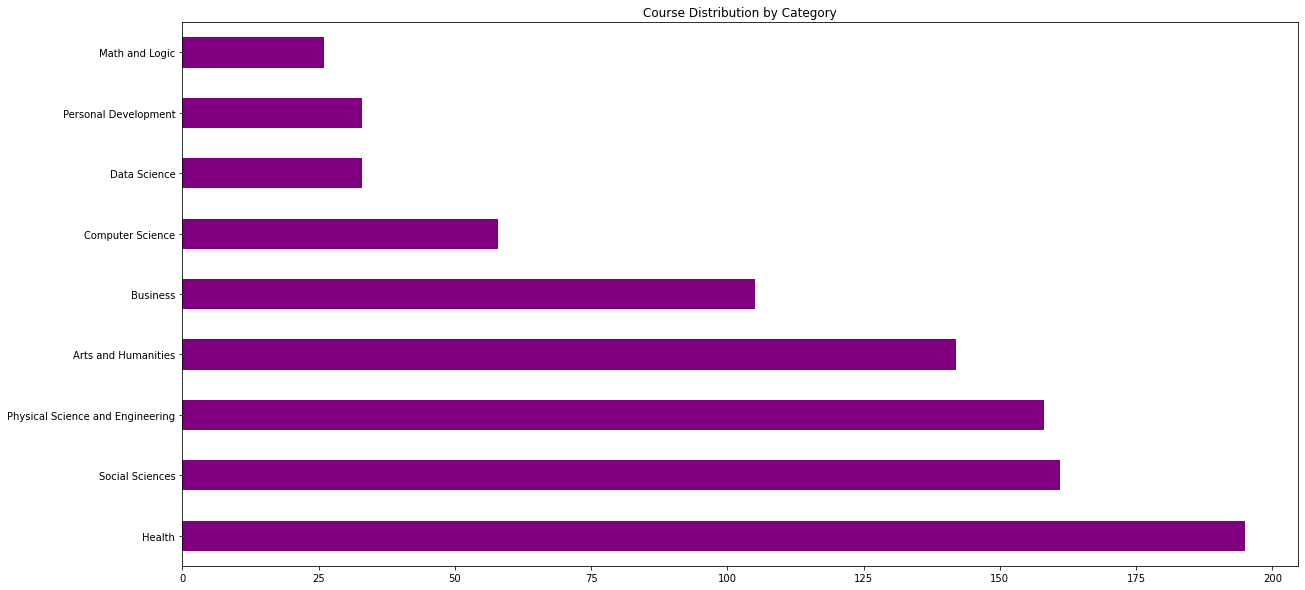

In [37]:
plt.figure(figsize=(20,10))
df['category'].value_counts().plot(kind='barh', color = 'purple', title = 'Course Distribution by Category');


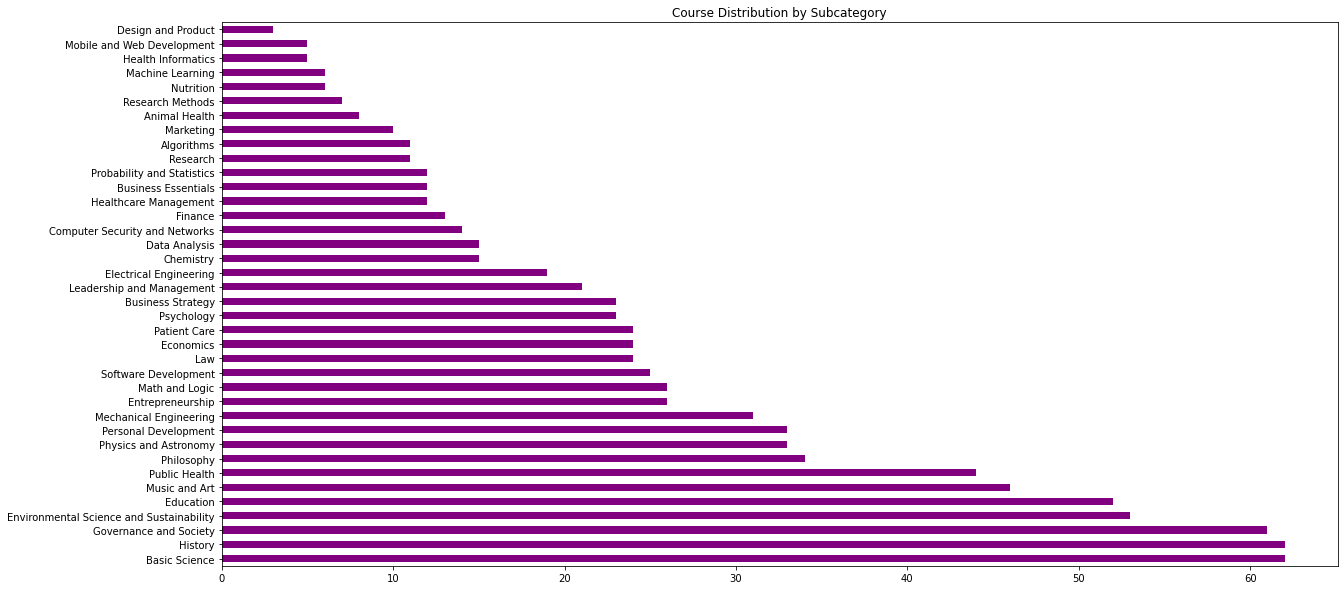

In [38]:
plt.figure(figsize=(20,10))
df['subcategory'].value_counts().plot(kind='barh', color = 'purple', title = 'Course Distribution by Subcategory');


In [39]:
df.to_csv('clean_data.csv')